In [23]:
import hist
import boost_histogram as bh
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt
from utilities import boostHistHelpers as hh
from wremnants import histselections as sel
from wremnants import datasets2016
from wremnants import plot_tools
import wremnants
import lz4.frame
import pickle
hep.style.use(hep.style.ROOT)

In [24]:
with lz4.frame.open("../mw_with_mu_eta_pt.pkl.lz4") as f:
    boost = pickle.load(f)

In [25]:
wp = boost['WplusmunuPostVFP']['output']
wm = boost['WminusmunuPostVFP']['output']
print(wp.keys())

dict_keys(['nominal', 'nominal_cvhbs', 'nominal_uncrct', 'nominal_gen', 'nominal_gen_smeared', 'crctd_over_gen', 'cvhbs_over_gen', 'uncrct_over_gen', 'gen_smeared_over_gen', 'effStatTnP', 'effSystTnP', 'muonL1PrefireStat', 'muonL1PrefireSyst', 'ecalL1Prefire', 'luminosity', 'qcdScale', 'vptInclusive_qcdScale', 'qcdScaleByHelicity', 'pdfNNPDF31', 'alphaS002pdfNNPDF31', 'massWeight', 'muonScaleSyst_gen_smear', 'muonScaleSyst', 'muonScaleSystPerSeDown', 'muonScaleSystPerSeUp', 'muonScaleSyst_responseWeights_gensmear', 'smearing_weights_down', 'smearing_weights_up', 'muonScaleVariationUpMil', 'muonScaleVariationDnMil', 'muonScaleVariationUpTenthmil', 'muonScaleVariationDnTenthmil', 'muonScaleVariationUpTenthmil_gen_smear', 'muonScaleVariationDnTenthmil_gen_smear', 'nominal_weights_hist', 'muonScaleSyst_responseWeights'])


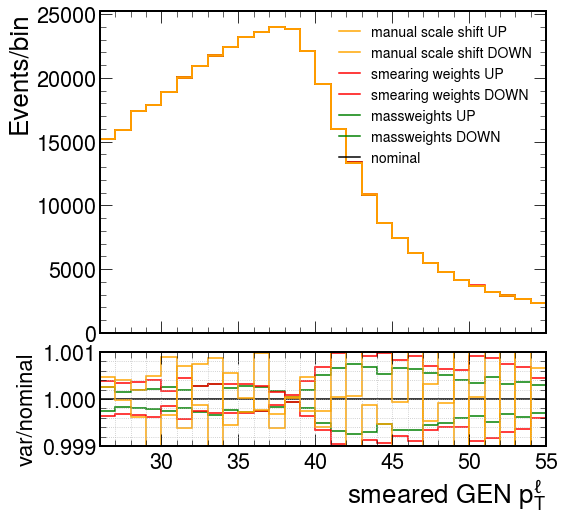

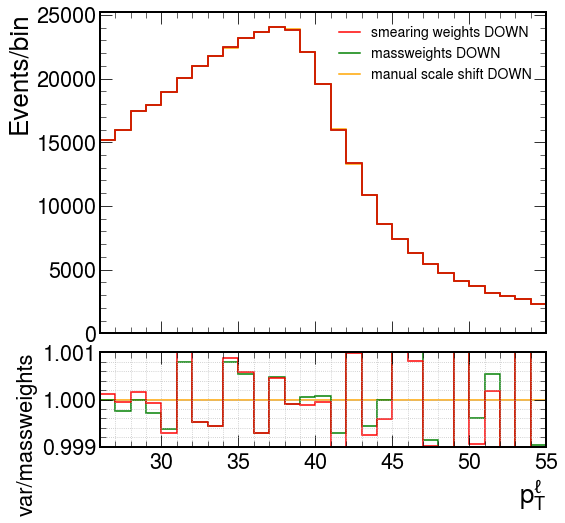

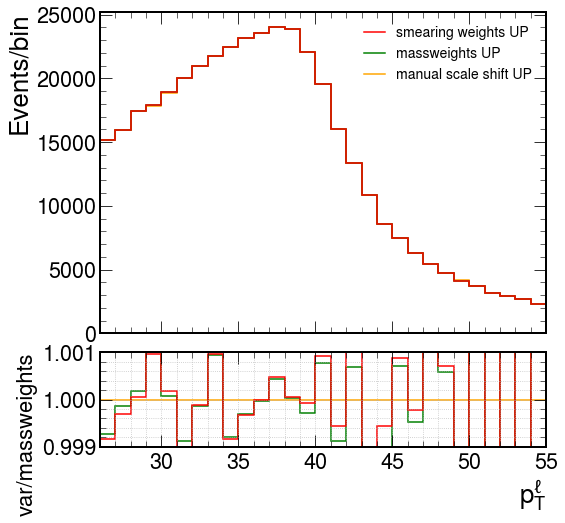

In [26]:
action = lambda x: x.project('pt')
#action = lambda x: sel.unrolledHist(x)

nominal = action(wp['nominal_gen_smeared'][{'charge':1j}])
ms_from_massweights = [action(wp['muonScaleSyst_gen_smear'][{'charge':1j}][...,0,0]), 
                       action(wp['muonScaleSyst_gen_smear'][{'charge':1j}][...,1,0])]
ms_from_smearing = [action(wp['muonScaleSyst_responseWeights_gensmear'][{'charge':1j}][...,0,0]), 
                    action(wp['muonScaleSyst_responseWeights_gensmear'][{'charge':1j}][...,0,1])]
ms_from_scale_var = [action(wp['muonScaleVariationDnTenthmil_gen_smear'][{'charge':1j}]),
                     action(wp['muonScaleVariationUpTenthmil_gen_smear'][{'charge':1j}])]
fig = plot_tools.makePlotWithRatioToRef(
    [
        nominal,
        ms_from_massweights[0],
        ms_from_massweights[1],
        ms_from_smearing[0],
        ms_from_smearing[1],
        ms_from_scale_var[0],
        ms_from_scale_var[1]#* nominal.sum().value / ms_from_scale_var.sum().value
    ],
    labels = [
        'nominal', 
        'massweights DOWN',
        'massweights UP',
        'smearing weights DOWN',
        'smearing weights UP',
        'manual scale shift DOWN',
        'manual scale shift UP'
    ],
    colors = ['black', 'green', 'green', 'red', 'red', 'orange', 'orange'],
    rrange = [0.999, 1.001],
    nlegcols = 1,
    rlabel = 'var/nominal',
    xlabel = r'smeared GEN $p_T^{\ell}$',
    grid = True
)

fig = plot_tools.makePlotWithRatioToRef(
    [
        ms_from_scale_var[0],
        ms_from_massweights[0],
        ms_from_smearing[0] #* ms_from_massweights[0].sum().value/ ms_from_smearing[0].sum().value,
        
    ],
    labels = [ 
        'manual scale shift DOWN',
        'massweights DOWN',
        'smearing weights DOWN'
        
    ],
    colors = ['orange','green', 'red'],
    rrange = [0.999, 1.001],
    nlegcols = 1,
    rlabel = 'var/massweights',
    xlabel = r'$p_T^{\ell}$',
    grid = True
)

fig = plot_tools.makePlotWithRatioToRef(
    [
        ms_from_scale_var[1],
        ms_from_massweights[1],
        ms_from_smearing[1] #* ms_from_massweights[0].sum().value/ ms_from_smearing[0].sum().value,
        
    ],
    labels = [ 
        'manual scale shift UP',
        'massweights UP',
        'smearing weights UP'
        
    ],
    colors = ['orange','green', 'red'],
    rrange = [0.999, 1.001],
    nlegcols = 1,
    rlabel = 'var/massweights',
    xlabel = r'$p_T^{\ell}$',
    grid = True
)

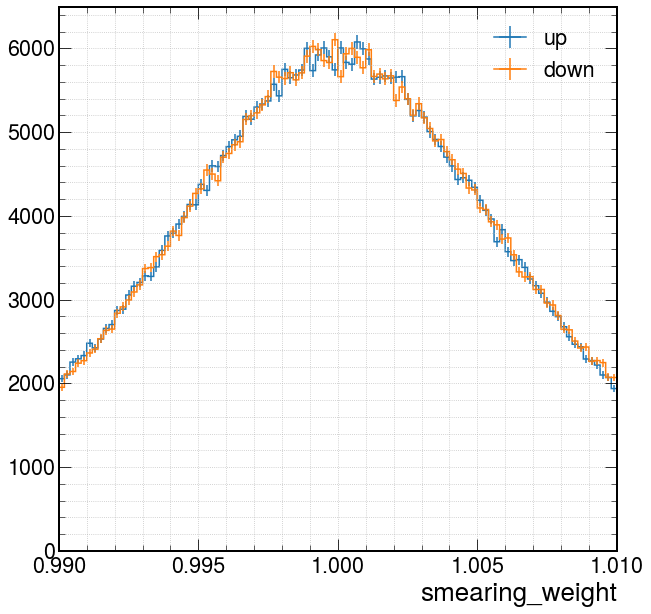

In [27]:
fig, ax = plt.subplots()
hep.histplot(wp['smearing_weights_up'].project('smearing_weight'), label = "up", ax=ax)
hep.histplot(wp['smearing_weights_down'].project('smearing_weight'), label = "down", ax=ax)
ax.legend()
ax.set_xlim(0.99,1.01)
ax.grid(which='both')

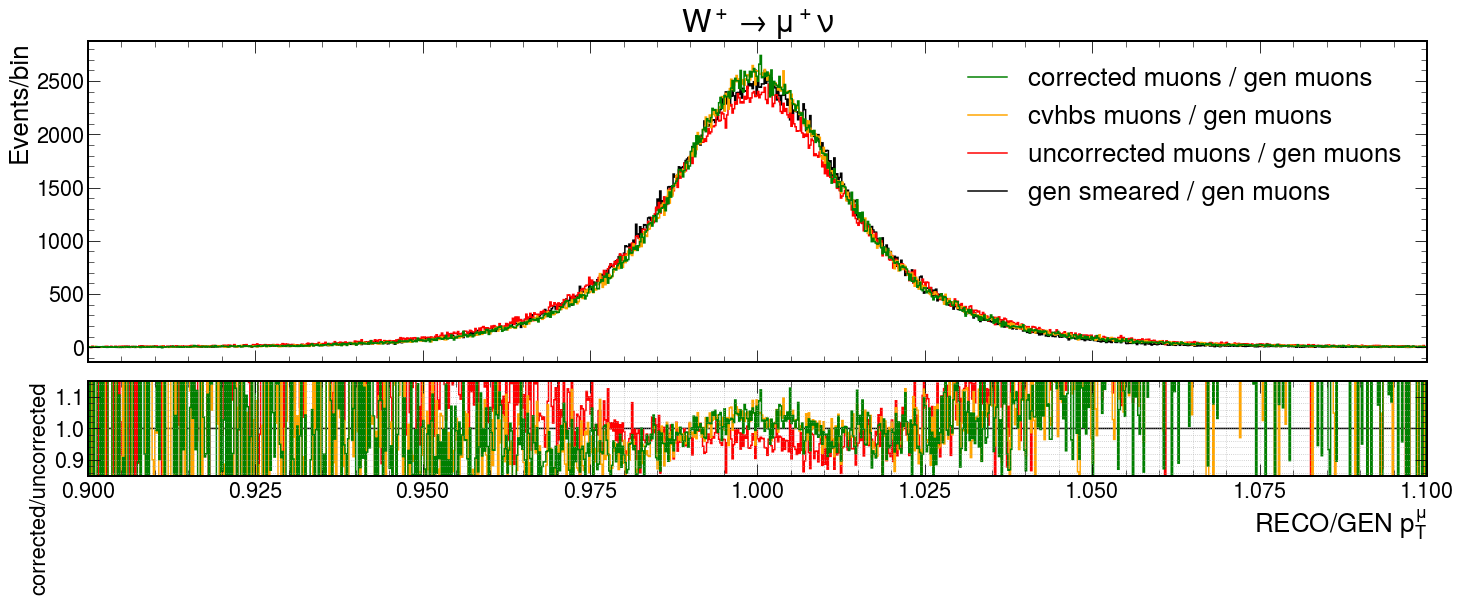

In [28]:
wp_label = r'$W^+ \rightarrow \mu^+ \nu$' 
fig = plot_tools.makePlotWithRatioToRef(
    [
        wp['gen_smeared_over_gen'].project('reco_pt_over_gen'),
        wp['uncrct_over_gen'].project('reco_pt_over_gen'),
        wp['cvhbs_over_gen'].project('reco_pt_over_gen'),
        wp['crctd_over_gen'].project('reco_pt_over_gen')
    ],
    labels = [ 
        'gen smeared / gen muons',
        'uncorrected muons / gen muons',
        'cvhbs muons / gen muons',
        'corrected muons / gen muons'
    ],
    colors = ['black','red', 'orange', 'green'],
    rrange = [0.85, 1.15],
    nlegcols = 1,
    rlabel = 'corrected/uncorrected',
    xlabel = r'RECO/GEN $p_T^{\mu}$',
    #xlim = [0.9995, 1.0005],
    grid = True,
    bin_density = 400,
    x_ticks_ndp = 3,
    plot_title = wp_label
)

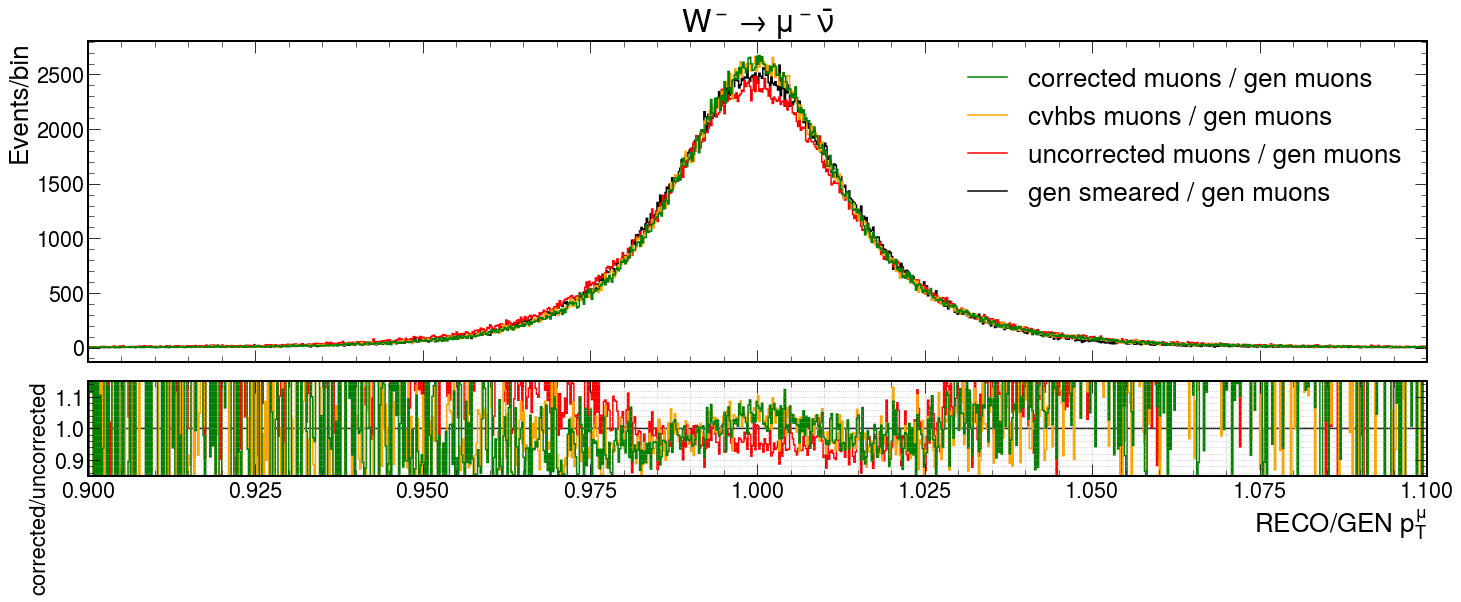

In [29]:
wm_label = r'$W^- \rightarrow \mu^- \bar{\nu}$' 
fig = plot_tools.makePlotWithRatioToRef(
    [
        wm['gen_smeared_over_gen'].project('reco_pt_over_gen'),
        wm['uncrct_over_gen'].project('reco_pt_over_gen'),
        wm['cvhbs_over_gen'].project('reco_pt_over_gen'),
        wm['crctd_over_gen'].project('reco_pt_over_gen')
    ],
    labels = [ 
        'gen smeared / gen muons',
        'uncorrected muons / gen muons',
        'cvhbs muons / gen muons',
        'corrected muons / gen muons'
    ],
    colors = ['black','red', 'orange', 'green'],
    rrange = [0.85, 1.15],
    nlegcols = 1,
    rlabel = 'corrected/uncorrected',
    xlabel = r'RECO/GEN $p_T^{\mu}$',
    #xlim = [0.9995, 1.0005],
    grid = True,
    bin_density = 400,
    x_ticks_ndp = 3,
    plot_title = wm_label
)

Hist(
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  storage=Weight()) # Sum: WeightedSum(value=398568, variance=491711) (WeightedSum(value=459008, variance=561876) with flow)


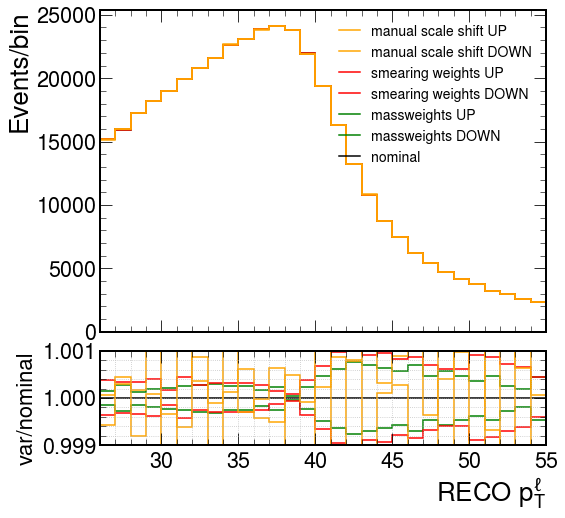

In [30]:
nominal_gen_smearing = wp['nominal_gen_smeared'][{'charge':1j}].project('pt', 'eta')
print(nominal_gen_smearing)

gen_smeared_msv_from_sw = [wp['muonScaleSyst_responseWeights_gensmear'][{'charge':1j}][...,0,0].project('pt', 'eta'), 
                           wp['muonScaleSyst_responseWeights_gensmear'][{'charge':1j}][...,0,1].project('pt', 'eta')]
smearing_weights_per_bin_up = hh.divideHists(gen_smeared_msv_from_sw[0], nominal_gen_smearing)
smearing_weights_per_bin_dn = hh.divideHists(gen_smeared_msv_from_sw[1], nominal_gen_smearing)

nominal_reco = wp['nominal'][{'charge':1j}].project('pt', 'eta')
msv_reco_massweights = [wp['muonScaleSyst'][{'charge':1j}][...,0,0].project('pt', 'eta'), 
                        wp['muonScaleSyst'][{'charge':1j}][...,1,0].project('pt', 'eta')]
msv_reco_manual = [wp['muonScaleVariationDnTenthmil'][{'charge':1j}].project('pt', 'eta'), 
                   wp['muonScaleVariationUpTenthmil'][{'charge':1j}].project('pt', 'eta')]
#msv_reco_sw = [hh.multiplyHists(nominal_reco, smearing_weights_per_bin_dn),
#               hh.multiplyHists(nominal_reco, smearing_weights_per_bin_up)]

msv_reco_sw = [wp['muonScaleSyst_responseWeights'][...,0], wp['muonScaleSyst_responseWeights'][...,1]]
fig = plot_tools.makePlotWithRatioToRef(
    [
        action(nominal_reco),
        action(msv_reco_massweights[0]),
        action(msv_reco_massweights[1]),
        action(msv_reco_sw[0]),
        action(msv_reco_sw[1]),
        action(msv_reco_manual[0]),
        action(msv_reco_manual[1])#* nominal.sum().value / ms_from_scale_var.sum().value
    ],
    labels = [
        'nominal', 
        'massweights DOWN',
        'massweights UP',
        'smearing weights DOWN',
        'smearing weights UP',
        'manual scale shift DOWN',
        'manual scale shift UP'
    ],
    colors = ['black', 'green', 'green', 'red','red', 'orange', 'orange'],
    rrange = [0.999, 1.001],
    nlegcols = 1,
    rlabel = 'var/nominal',
    xlabel = r'RECO $p_T^{\ell}$',
    grid = True
)

In [31]:
proj_axes = ['pt', 'eta']
a = wp['muonScaleSyst_gen_smear'].project(*proj_axes)
print(a.axes)
a.project('pt')
#print(wp['muonScaleSyst_gen_smear'][{'pt':hist.loc(26)}].project('pt'))

(Regular(29, 26, 55, name='pt', label='pt'), Regular(48, -2.4, 2.4, name='eta', label='eta'))


Hist(Regular(29, 26, 55, name='pt', label='pt'), storage=Weight()) # Sum: WeightedSum(value=797188, variance=983518) (WeightedSum(value=918011, variance=1.12377e+06) with flow)

In [32]:
proc = 'WplusmunuPostVFP'
print(any([x in proc for x in ['mlus', 'Plus']]))

False


In [33]:
wp['muonScaleSyst_responseWeights']

Hist(
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='downUpVar', label='downUpVar'),
  storage=Weight()) # Sum: WeightedSum(value=797499, variance=2.96158e+06) (WeightedSum(value=918025, variance=3.38078e+06) with flow)